In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
path=os.listdir(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Training/')
classes={'glioma_tumor':0,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3}

In [3]:
#appending inputs into X and output, targets into Y.
import cv2
X=[]
Y=[]
for cls in classes:
    pth=(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Training/')+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j, 0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1, 2, 3])

In [5]:
X=np.array(X)
Y=np.array(Y)

In [6]:
pd.Series(Y).value_counts()

3    827
0    826
1    822
2    395
dtype: int64

In [7]:
X.shape

(2870, 200, 200)

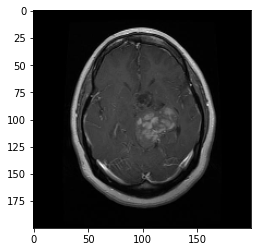

In [8]:
plt.imshow(X[0],cmap='gray')

In [9]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(2870, 40000)

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.10)

In [11]:
xtrain.shape,xtest.shape

((2583, 40000), (287, 40000))

In [12]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape,xtest.shape)

pca=PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(2583, 40000) (287, 40000)


In [15]:
#print(pca_train.shape,pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
lg=LogisticRegression(C=0.1)
lg.fit(pca_train,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [18]:
sv=SVC()
sv.fit(pca_train,ytrain)

SVC()

In [19]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(pca_train,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [20]:
print("Training score:",lg.score(pca_train,ytrain))
print("Testing score:",lg.score(pca_test,ytest))

Training score: 0.9984514130855594
Testing score: 0.8153310104529616


In [21]:
print("Training score:",sv.score(pca_train,ytrain))
print("Testing score:",sv.score(pca_test,ytest))

Training score: 0.9419279907084785
Testing score: 0.7874564459930313


In [22]:
print("Training score:",knn.score(pca_train,ytrain))
print("Testing score:",knn.score(pca_test,ytest))

Training score: 0.9376693766937669
Testing score: 0.8501742160278746


In [23]:
pred=sv.predict(pca_test)
#printing indexes of misclassifications
np.where(ytest!=pred)

(array([  0,   1,   9,  11,  15,  18,  23,  28,  37,  54,  55,  57,  62,
         63,  65,  66,  67,  72,  79,  82,  84,  87,  94,  98, 110, 116,
        117, 118, 119, 123, 133, 148, 184, 185, 186, 187, 190, 191, 193,
        194, 196, 201, 204, 206, 208, 209, 211, 214, 219, 225, 229, 233,
        236, 239, 260, 261, 266, 272, 273, 274, 278], dtype=int64),)

In [24]:
pred[6]

0

In [25]:
ytest[6]

0

In [26]:
#TEST MODEL

In [27]:
dec={0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

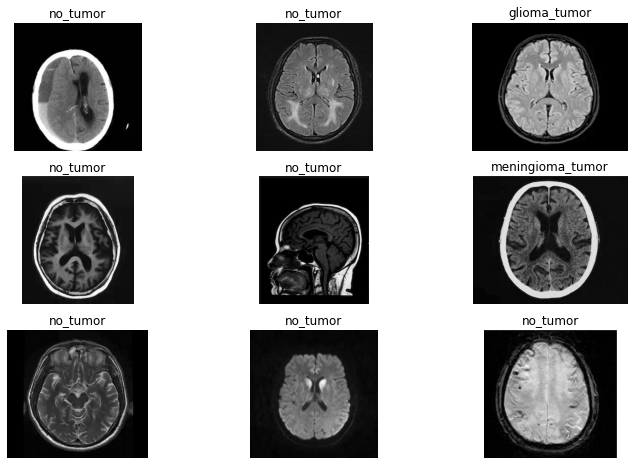

In [28]:
plt.figure(figsize=(12,8))
p=os.listdir(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Testing/')
c=1
for i in os.listdir(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img=cv2.imread(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Testing/no_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1 

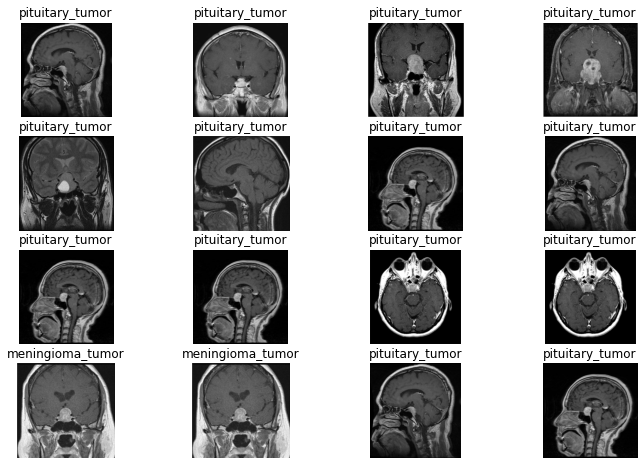

In [29]:
plt.figure(figsize=(12,8))
p=os.listdir(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Testing/')
c=1
for i in os.listdir(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img=cv2.imread(r'C:/Users/hp/OneDrive/Desktop/Brain Tumor/Testing/pituitary_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1